In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
energydata_df=pd.read_csv('KAG_energydata_complete.csv')
energydata_df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [20]:
energydata_df=energydata_df.drop('date', axis=1)
energydata_df.isnull().sum()
energydata_df_cleaned=energydata_df.dropna()

In [21]:
scaler=MinMaxScaler()

target = energydata_df_cleaned['Appliances']
features = energydata_df_cleaned.drop('Appliances', axis=1)
X_scaled=scaler.fit_transform(features)

In [22]:
print(features.shape)
print(features.iloc[0:2, :])
print(target.shape)
print(target.iloc[0:2])

(19735, 27)
   lights     T1       RH_1    T2     RH_2     T3   RH_3    T4       RH_4  \
0      30  19.89  47.596667  19.2  44.7900  19.79  44.73  19.0  45.566667   
1      30  19.89  46.693333  19.2  44.7225  19.79  44.79  19.0  45.992500   

          T5  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  Windspeed  \
0  17.166667  ...  17.033333  45.53  6.600000        733.5    92.0   7.000000   
1  17.166667  ...  17.066667  45.56  6.483333        733.6    92.0   6.666667   

   Visibility  Tdewpoint        rv1        rv2  
0   63.000000        5.3  13.275433  13.275433  
1   59.166667        5.2  18.606195  18.606195  

[2 rows x 27 columns]
(19735,)
0    60
1    60
Name: Appliances, dtype: int64


In [23]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [25]:
# Modell építése
model = Sequential([
    # Dense 1
    Dropout(0.2), Dense(128, activation='relu', input_shape=(28,)),
    # Dense 2
    Dropout(0.2), Dense(84, activation='relu'),
    # Dense 3
    Dropout(0.2), Dense(32, activation='relu'),
    # Dense 4
    Dense(1, activation='linear')
])

# Modell összeállítása
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


C:\Users\Szilárd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Modell tanítása
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13850.3623 - val_loss: 10318.5000
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11226.0586 - val_loss: 9753.6299
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10623.9609 - val_loss: 9608.0752
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10606.4023 - val_loss: 9714.8457
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9844.7256 - val_loss: 9524.7939
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10799.9492 - val_loss: 9728.6729
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10164.7783 - val_loss: 9465.0674
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10301.9971 - val_loss: 9444.7197
Epoch 9/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9923.5742 - val_loss: 9491.6621
Epoch 10/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10431.6191 - val_loss: 9504.2363
Epoch 11/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

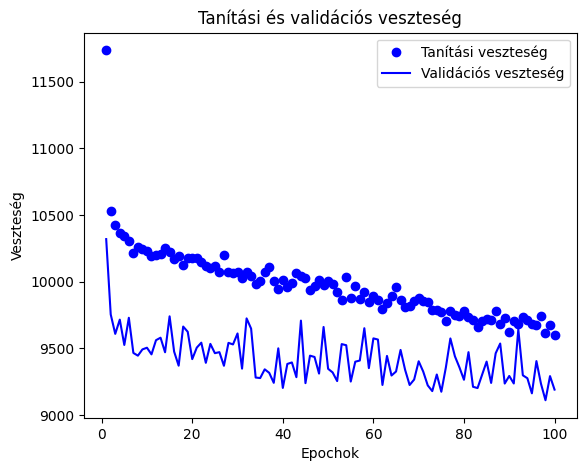

In [31]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Veszteség grafikon
plt.figure(figsize=(14,5))
plt.plot(epochs, loss, 'bo', label='Tanítási veszteség')
plt.plot(epochs, val_loss, 'b', label='Validációs veszteség')
plt.title('Tanítási és validációs veszteség')
plt.xlabel('Epochok')
plt.ylabel('Veszteség')
plt.legend()
plt.show()


In [28]:
test_loss = model.evaluate(X_test, y_test)
test_accuracy=mode
print(f'Test Loss: {test_loss}')

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7590.8271
Test Loss: 8793.388671875
